In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.12/06


In [4]:
f = r.TFile("../newPileupHists_gm2offline_ana_60h_pileup_corrected_only.root")
f.cd()
f.ls()

TFile**		../newPileupHists_gm2offline_ana_60h_pileup_corrected_only.root	
 TFile*		../newPileupHists_gm2offline_ana_60h_pileup_corrected_only.root	
  KEY: TH3D	corrected;1	corrected


In [8]:
c = r.TCanvas('c','c',1000,600)
r.gStyle.SetOptStat(0)

fitTuple = []

leg = r.TLegend(0.12,0.12,0.3,0.3)
calo_especs = []
wiggle  = f.Get('corrected').Clone("wiggle")
wiggle.GetListOfFunctions().Clear()
endpoint_fit = r.TF1("endpoint_fit", '[0]*(x-[1])', 2000,2500)

for i in range(24):
    wiggle.GetZaxis().SetRange(i+1,i+1)
    wiggle.GetYaxis().SetRange(0,300)
    wiggle.GetXaxis().SetRange(300,1200)
    calo_especs.append(wiggle.Project3D('y_{}'.format(i+1)))
#    calo_especs[i].Rebin(3)
    calo_especs[i].SetTitle('Calo Energy Spectrum')
    calo_especs[i].GetXaxis().SetRangeUser(500,3000)
    calo_especs[i].SetMarkerSize(0.8)
    calo_especs[i].SetMarkerStyle(int(i/6)+20)
#    calo_especs[i].Scale(1./calo_especs[i].GetEntries())

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Warning in <Fit>: Fit data is empty 
Info in <TCanvas::Print>: png file ./0.png has been created
Warning in <Fit>: Fit data is empty 
Info in <TCanvas::Print>: png file ./1.png has been created
Warning in <Fit>: Fit data is empty 
Info in <TCanvas::Print>: png file ./2.png has been created
Warning in <Fit>: Fit data is empty 
Info in <TCanvas::Print>: png file ./3.png has been created
Warning in <Fit>: Fit data is empty 
Info in <TCanvas::Print>: png file ./4.png has been created
Warning in <Fit>: Fit data is empty 
Info in <TCanvas::Print>: png file ./5.png has been created
Warning in <Fit>: Fit data is empty 
Info in <TCanvas::Print>: png file ./6.png has been created
Warning in <Fit>: Fit data is empty 
Info in <TCanvas::Print>: png file ./7.png has been created
Warning in <Fit>: Fit data is empty 
Info in <TCanvas::Print>: png file ./8.png has been created
Warning in <Fit>: Fit data is empty 
Info in <TCanvas::Print>: png file ./9.png has been created
Warning in <Fit>: Fit data is 

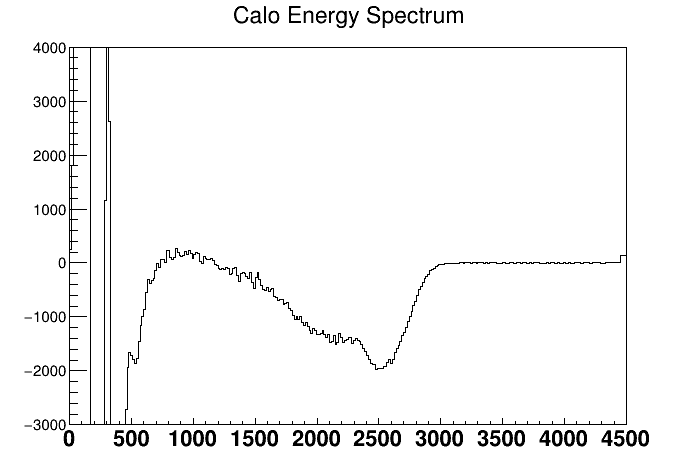

In [10]:
calo_gradient = []
vertex_list = []
wiggle.GetListOfFunctions().Clear()

for i in range(24):
    wiggle.GetZaxis().SetRange(i+1,i+1)
    wiggle.GetYaxis().SetRange(0,300)
    wiggle.GetXaxis().SetRange(0,4500)
    calo_gradient.append(wiggle.Project3D('y_{}'.format(i+1)).Clone('y_{}'.format(i+1)))

for j in range(24):
    c3 = r.TCanvas()
    gradientHist = calo_gradient[j]
    gradientHist.SetName("gradientHist_"+str(j))

    for i in range(gradientHist.GetNbinsX()-2):
        calo_especs[j].GetListOfFunctions().Clear()
        calo_especs[j].GetXaxis().SetRange(0,4500)
        if i == 0:
            gradientHist.SetBinContent(i,0)
        else:
            binContentBefore = calo_especs[j].GetBinContent(i-1)
            binContentAfter = calo_especs[j].GetBinContent(i+1)
            slope = (-1*binContentBefore + binContentAfter) / (2*calo_especs[j].GetBinWidth(i))
            gradientHist.SetBinContent(i,slope)

    gradientHist.GetListOfFunctions().Clear()
    gradientHist.Draw("HIST")
    gradientHist.GetYaxis().SetRangeUser(-3000,4000)
    gradientHist.GetXaxis().SetRangeUser(0,4500)

    ding = 'gradientFit'
    gradientFit = r.TF1(ding, '[0]+[1]*x+[2]*x*x', 1500,3000)
    gradientFit.SetParameters(0,0,-1)
    gradientHist.Fit(ding,"REMB")
    gradientFit.Draw("SAME")

    c3.Draw()
    c3.Print("./"+str(j)+".png")

    vertex = -gradientFit.GetParameter(1)/(2*gradientFit.GetParameter(2))
    vertex_list.append(vertex)
    gradientFit.Delete()

print(vertex_list)